## Saumya Pailwan
### Data Science & Business Analytics Intern @ The Sparks Foundation
### Task - 1: Prediction using Supervised ML
### Complete implementation using cost function & gradient descent

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
# importing the data
data = pd.read_csv("student_scores.csv")

In [3]:
# checking 1st five rows in dataframe
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# checking rows and columns
data.shape

(25, 2)

In [5]:
# check for null values
data.isnull().any()

Hours     False
Scores    False
dtype: bool

In [6]:
# defining the variables
X = data["Hours"]
y = data["Scores"]

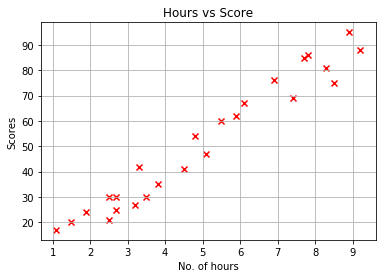

In [7]:
# PLot the data
plt.scatter(X,y,c = "r",marker="x")
plt.xlabel("No. of hours")
plt.ylabel("Scores")
plt.title("Hours vs Score")
plt.grid(True)
plt.show()

In [8]:
# adding another axis
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])

In [9]:
# allocate valoes to the variables
iterations = 500
alpha = 0.01
m = len(y)
ones = np.ones((m,1))
X = np.hstack((ones, X))

In [10]:
X

array([[1. , 2.5],
       [1. , 5.1],
       [1. , 3.2],
       [1. , 8.5],
       [1. , 3.5],
       [1. , 1.5],
       [1. , 9.2],
       [1. , 5.5],
       [1. , 8.3],
       [1. , 2.7],
       [1. , 7.7],
       [1. , 5.9],
       [1. , 4.5],
       [1. , 3.3],
       [1. , 1.1],
       [1. , 8.9],
       [1. , 2.5],
       [1. , 1.9],
       [1. , 6.1],
       [1. , 7.4],
       [1. , 2.7],
       [1. , 4.8],
       [1. , 3.8],
       [1. , 6.9],
       [1. , 7.8]])

In [11]:
# Implementing the cost function
def computeCost(X,y,theta):
    hx = np.dot(X,theta)
    prediction = hx - y
    cost = np.sum(np.power(prediction,2))/(2*m)
    return cost

J = computeCost(X,y,theta)
print(J)

1632.02


In [12]:
# Implementing the gradient descent function
def gradientDescent(X,y,theta,alpha,iterations):
    J_history=[]
    for _ in range(iterations):
        predictions = X.dot(theta)
        error = np.dot(X.transpose(),(predictions -y))
        descent=alpha * 1/m * error
        theta-=descent
        J_history.append(computeCost(X,y,theta))
    
    return theta, J_history

theta,J_history = gradientDescent(X,y,theta,0.01,500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =2.14 + 9.83x1


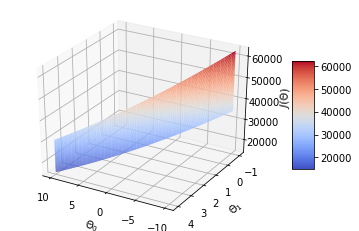

In [13]:
# Plotting 3D graph
from mpl_toolkits.mplot3d import Axes3D

#Generating values for theta0, theta1 and the resulting cost value
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computeCost(X,y,t)

#Generating the surface plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("$\Theta_0$")
ax.set_ylabel("$\Theta_1$")
ax.set_zlabel("$J(\Theta)$")

#rotate for better angle
ax.view_init(30,120)

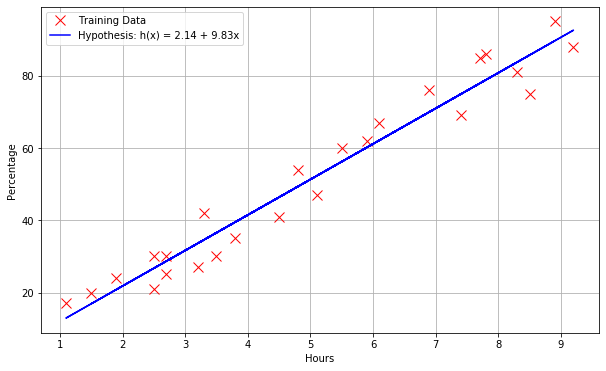

In [14]:
# fitting the line over the data

def myfit(xval):
    return theta[0] + theta[1]*xval

plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10,label='Training Data')
plt.plot(X[:,1],myfit(X[:,1]),'b-',label = 'Hypothesis: h(x) = %0.2f + %0.2fx'%(theta[0],theta[1]))
plt.grid(True) 
plt.ylabel('Percentage')
plt.xlabel('Hours')
plt.legend()

In [16]:
# making predictions
def predict(x,theta):
    """
    Takes in numpy array of x and theta and return the predicted value of y based on theta
    """
    predictions= np.dot(theta.transpose(),x)
    
    return predictions[0]

predict1 = predict(np.array([1,9.25]),theta)
print("For Hours = 9.25 we predict a percentage of "+str(round(predict1,2)))

For Hours = 9.25 we predict a percentage of 93.08


In [22]:
actual1 = data.loc[6]["Scores"]
actual1

88.0

In [23]:
# calculating the errors
# 1. Mean squared error
MSE = np.square(np.subtract(actual1,predict1)).mean()

In [24]:
MSE

25.778049924324637

In [26]:
# 2.Root mean squared error
import math
RMSE = math.sqrt(MSE)
RMSE

5.077208871449415